In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# === Configuración estilo paper ===
mpl.rcParams.update({
    # Fuente y LaTeX
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Times"],
    "axes.unicode_minus": False,

    # Tamaño de fuente
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,

    # Grosor de líneas y ejes
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.linewidth": 1,

    # Estilo de ticks
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,

    # Grid discreto
    "axes.grid": True,
    "grid.alpha": 0.3,
    "grid.linestyle": "--",

    # Tamaño de la figura por default
    "figure.figsize": (6,4),

    # DPI alto (para exportar a PDF/PNG)
    "figure.dpi": 120
})


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LR = 0.006
NUM_FEATURES = 6
BASE_SAVE_DIR = f"/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2/{NUM_FEATURES}features_{LR}"


# parámetros que querés graficar
param_list = [5, 6, 7, 8]

plt.figure(figsize=(10,6))

palette = sns.color_palette("rocket", len(param_list))

for i, num_params in enumerate(param_list):
    csv_path = f"{BASE_SAVE_DIR}/loss_curve_NUMFEATURES_{NUM_FEATURES}_NUM_PARAMS_{num_params}.csv"
    df = pd.read_csv(csv_path)
    
    # # graficar solo train loss (más limpio), pero podés agregar test si querés
    plt.plot(df["Epoch"], df["TrainLossAvg"], label=f"{num_params} parámetros", linewidth=2, color=palette[i])
    
    plt.axhline(y=df["TrainLossAvg"].iloc[-1], linestyle="--", alpha=0.6)

plt.xlabel("Epoch")
plt.ylabel("Average Train Loss")
plt.title(f"Curvas de pérdida (NUM_FEATURES={NUM_FEATURES})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


FileNotFoundError: Matplotlib's TeX implementation searched for a file named 'ptmr7t.tfm' in your texmf tree, but could not find it

Error in callback <function _draw_all_if_interactive at 0x117aad240> (for post_execute), with arguments args (),kwargs {}:


FileNotFoundError: Matplotlib's TeX implementation searched for a file named 'ptmr7t.tfm' in your texmf tree, but could not find it

FileNotFoundError: Matplotlib's TeX implementation searched for a file named 'ptmr7t.tfm' in your texmf tree, but could not find it

<Figure size 1200x720 with 1 Axes>

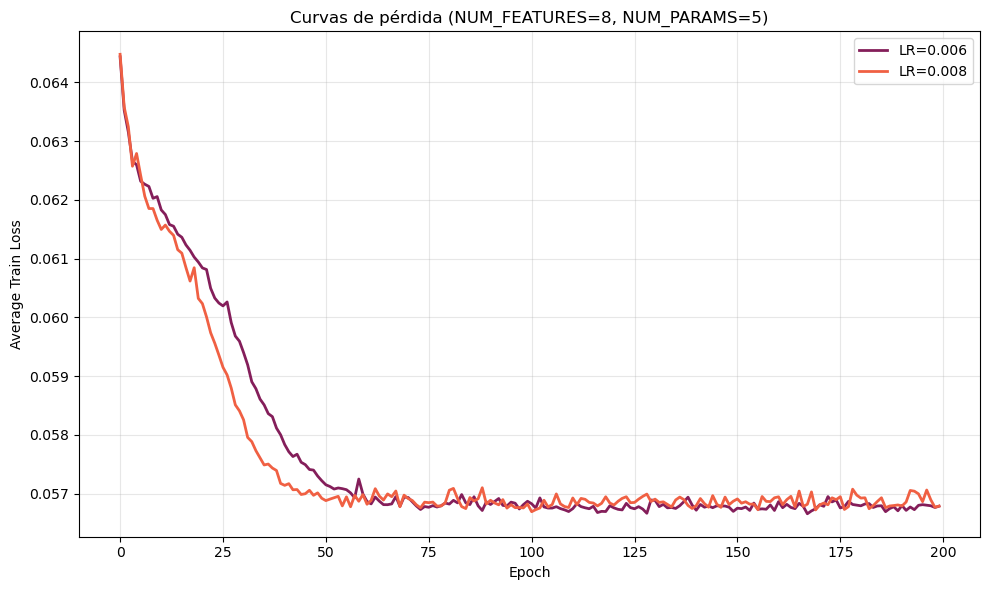

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

BASE_PATH = f"/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2/"
NUM_FEATURES = 8
NUM_PARAMS   = 5  # 👈 fijá acá el número de parámetros que quieras comparar
lrs = [0.006, 0.008]
palette = sns.color_palette("rocket", len(lrs))

plt.figure(figsize=(10,6))

for i,lr in enumerate(lrs):
    folder = f"{BASE_PATH}/{NUM_FEATURES}features_{lr:.3f}"
    csv_path = f"{folder}/loss_curve_NUMFEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}.csv"
    
    df = pd.read_csv(csv_path)
    plt.plot(df["Epoch"], df["TrainLossAvg"], label=f"LR={lr}", linewidth=2, color=palette[i])

plt.xlabel("Epoch")
plt.ylabel("Average Train Loss")
plt.title(f"Curvas de pérdida (NUM_FEATURES={NUM_FEATURES}, NUM_PARAMS={NUM_PARAMS})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [132]:
import pandas as pd
import matplotlib.pyplot as plt

BASE_PATH = "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2"
LR = 0.006
features_list = [4, 5, 6, 7, 8]
params_list   = [4, 5, 6, 7, 8]

plt.figure(figsize=(8,6))

for i, num_features in enumerate(features_list):
    final_losses = []
    for num_params in params_list:
        csv_path = f"{BASE_PATH}/{num_features}features_{LR:.3f}/loss_curve_NUMFEATURES_{num_features}_NUM_PARAMS_{num_params}.csv"
        df = pd.read_csv(csv_path)
        final_loss = df["TrainLossAvg"].iloc[-1]   # último valor
        final_losses.append(final_loss)
    plt.plot(params_list, final_losses, marker="o", label=f"{num_features} features", color=palette[i])

plt.xlabel("Número de parámetros")
plt.ylabel("Final Train Loss")
plt.title(f"Loss final vs. Número de parámetros (LR={LR})")
plt.legend(title="Features")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2/4features_0.006/loss_curve_NUMFEATURES_4_NUM_PARAMS_4.csv'

<Figure size 800x600 with 0 Axes>

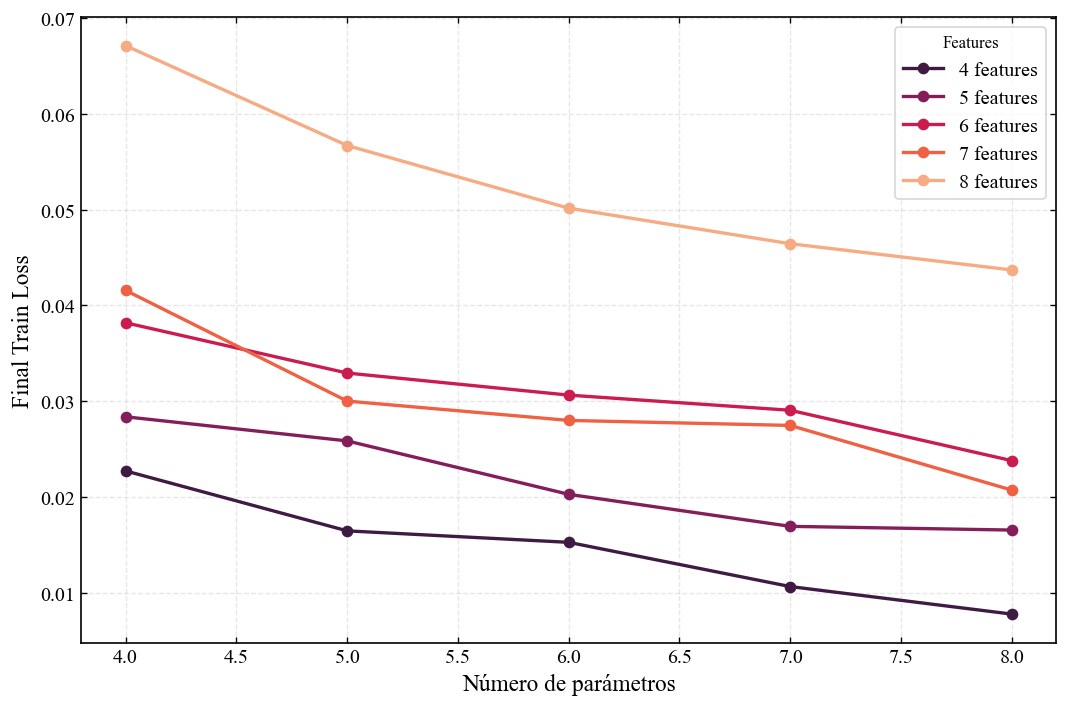

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE_PATH = "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2"
LR = 0.006
features_list = [4, 5, 6, 7, 8]
params_list   = [4, 5, 6, 7, 8]

palette = sns.color_palette("rocket", len(features_list))

# use_test = False  # True para graficar FinalTestLossAvg, False para FinalTrainLossAvg
# loss_col = "FinalTrainLossAvg" if use_test else "FinalTrainLossAvg"

loss_col = "FinalTrainLossAvg"


plt.figure(figsize=(9,6))

for i, F in enumerate(features_list):
    folder = f"{BASE_PATH}/{F}features_{LR:.3f}"
    xs, ys = [], []
    for P in params_list:
        metrics_path = f"{folder}/metrics_NUMFEATURES_{F}_NUM_PARAMS_{P}.csv"
        if not os.path.exists(metrics_path):
            print(f"[warn] no existe: {metrics_path}")
            continue
        df = pd.read_csv(metrics_path)
        if loss_col not in df.columns:
            print(f"[warn] columna {loss_col} no está en: {metrics_path}")
            continue
        xs.append(P)
        ys.append(float(df[loss_col].iloc[0]))
    if xs:
        plt.plot(xs, ys, marker="o", linewidth=2, label=f"{F} features", color=palette[i])

plt.xlabel("Número de parámetros")
plt.ylabel("Final Train Loss")
plt.grid(True, alpha=0.3)
plt.legend(title="Features")
plt.tight_layout()
plt.show()



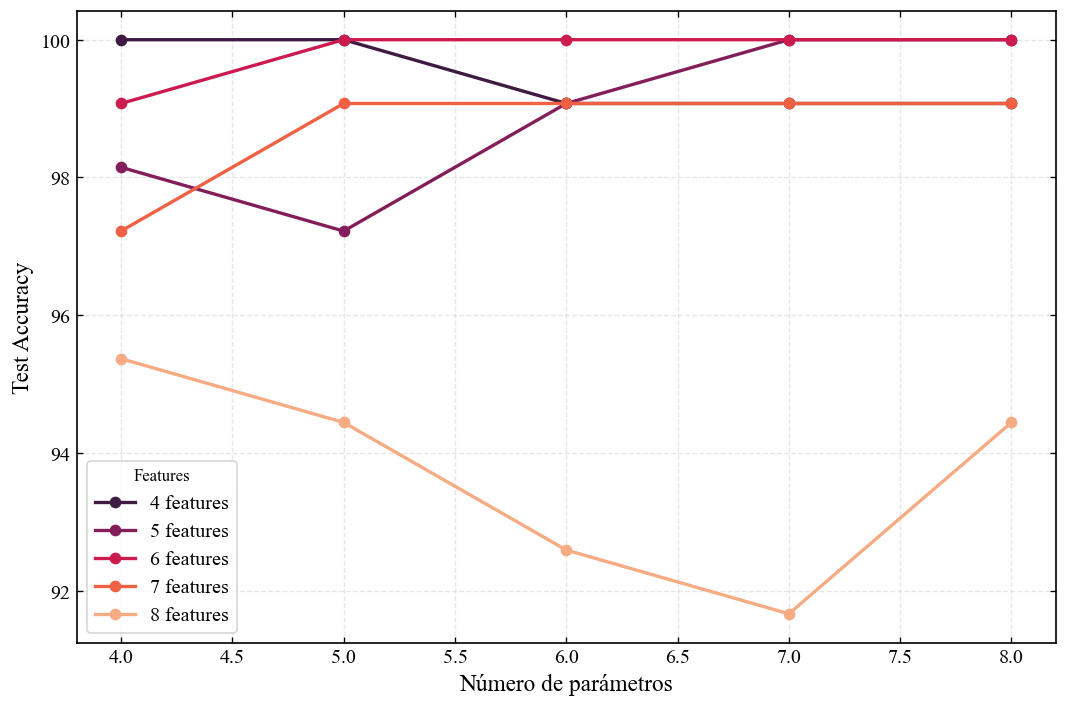

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE_PATH = "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2"
LR = 0.006
features_list = [4, 5, 6, 7, 8]
params_list   = [4, 5, 6, 7, 8]

palette = sns.color_palette("rocket", len(features_list))

loss_col = "TestAcc"

plt.figure(figsize=(9,6))

for i, F in enumerate(features_list):
    folder = f"{BASE_PATH}/{F}features_{LR:.3f}"
    xs, ys = [], []
    for P in params_list:
        metrics_path = f"{folder}/metrics_NUMFEATURES_{F}_NUM_PARAMS_{P}.csv"
        if not os.path.exists(metrics_path):
            print(f"[warn] no existe: {metrics_path}")
            continue
        df = pd.read_csv(metrics_path)
        if loss_col not in df.columns:
            print(f"[warn] columna {loss_col} no está en: {metrics_path}")
            continue
        xs.append(P)
        ys.append(float(df[loss_col].iloc[0]))
    if xs:
        plt.plot(xs, ys, marker="o", linewidth=2, label=f"{F} features", color=palette[i])

plt.xlabel("Número de parámetros")
plt.ylabel("Test Accuracy")
plt.grid(True, alpha=0.3)
plt.legend(title="Features")
plt.tight_layout()
plt.show()

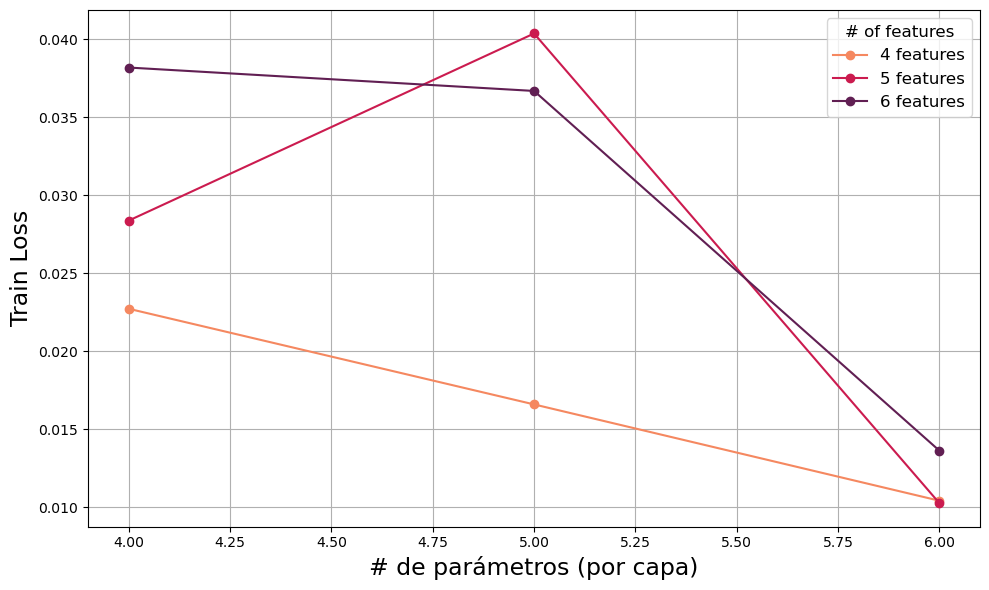

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

# Configuraciones
FEATURE_RANGE = range(4, 7)   # 4 a 8 features
PARAM_RANGE   = range(4, 7)   # 4 a 8 parámetros por capa
FREEZE = 0

base_folder = f"/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2/"

train_loss_by_features = {}

for NUM_FEATURES in FEATURE_RANGE:
    train_loss_list = []

    for NUM_PARAMS in PARAM_RANGE:
        folder = f"{base_folder}/{NUM_FEATURES}features/"
        path = os.path.join(folder, f"modelo_optimo_NUM_FEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_metrics.csv")

        if not os.path.exists(path):
            print(f"⚠️ Archivo no encontrado: {path}")
            train_loss_list.append(np.nan)  # Agregar NaN para mantener la longitud
            continue

        df = pd.read_csv(path)
        train_loss_list.append(df["Loss"].iloc[0])

    train_loss_by_features[NUM_FEATURES] = train_loss_list

# === Plot ===
palette = sns.color_palette("rocket", len(FEATURE_RANGE))

plt.figure(figsize=(10, 6))

for idx, (NUM_FEATURES, loss_list) in enumerate(train_loss_by_features.items()):
    plt.plot(
        list(PARAM_RANGE), 
        loss_list, 
        marker='o', 
        label=f'{NUM_FEATURES} features',
        color=palette[len(palette)-1-idx]
    )    
plt.xlabel("# de parámetros (por capa)", fontsize=17)
plt.ylabel("Train Loss", fontsize=17)
# plt.ylim(0.004, 0.025)
# plt.xlim(3.5, 4.5)
plt.grid(True)
plt.legend(title="# of features", fontsize=12, title_fontsize=12)
plt.tight_layout()
plt.show()


## 8 features

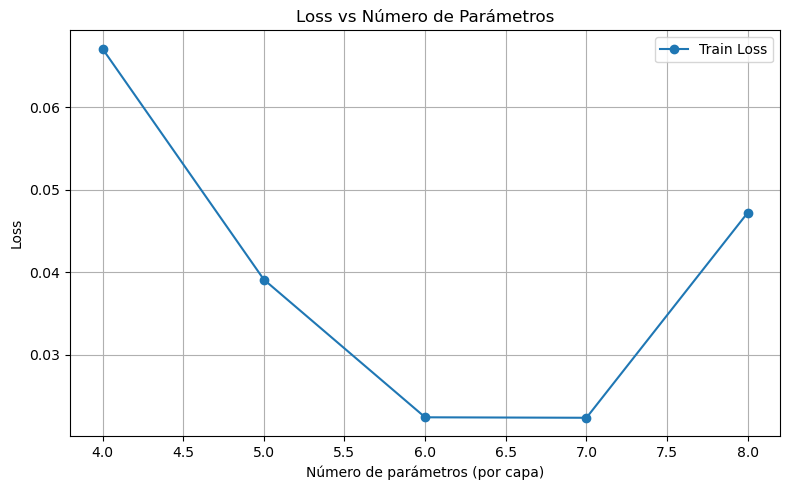

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

NUM_FEATURES = 8

FREEZE = 0

folder = f"/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2/{NUM_FEATURES}features"

param_range = range(4, 9)

num_params_list = []
train_loss_list = []
test_acc_list = []
init_weights   = []

for NUM_PARAMS in param_range:
    path = os.path.join(folder, f"modelo_optimo_NUM_FEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_metrics.csv")
    
    if not os.path.exists(path):
        print(f"⚠️ Archivo no encontrado: {path}")
        continue

    df = pd.read_csv(path)
    
    num_params_list.append(NUM_PARAMS)
    train_loss_list.append(df["Loss"].iloc[0])
    test_acc_list.append(df["TestAcc"].iloc[0])
    init_weights.append(df['InitWeights'].iloc[0])

# === Plot ===
plt.figure(figsize=(8, 5))
plt.plot(np.arange(4,9), train_loss_list, marker='o', label='Train Loss')
plt.xlabel("Número de parámetros (por capa)")
plt.ylabel("Loss")
plt.title("Loss vs Número de Parámetros")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 7 features

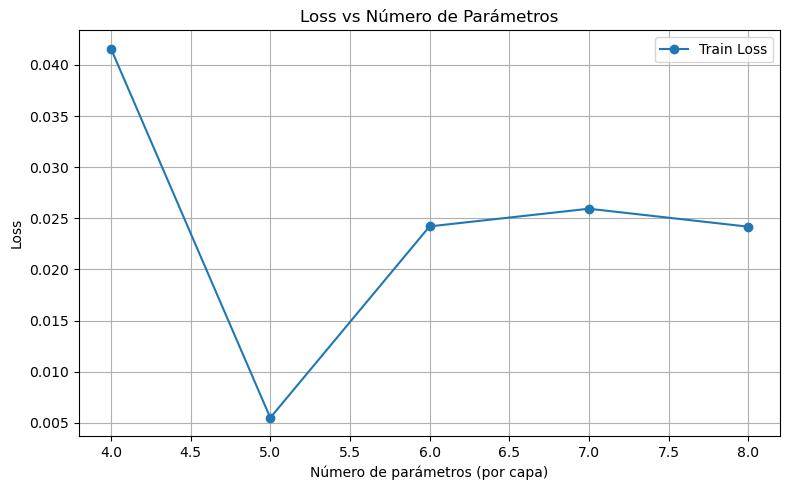

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

NUM_FEATURES = 7

FREEZE = 0
folder = f"/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2/{NUM_FEATURES}features"

param_range = range(4, 9)

num_params_list = []
train_loss_list = []
test_acc_list = []
init_weights   = []

for NUM_PARAMS in param_range:
    path = os.path.join(folder, f"modelo_optimo_NUM_FEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_metrics.csv")
    
    if not os.path.exists(path):
        print(f"⚠️ Archivo no encontrado: {path}")
        continue

    df = pd.read_csv(path)
    
    num_params_list.append(NUM_PARAMS)
    train_loss_list.append(df["Loss"].iloc[0])
    test_acc_list.append(df["TestAcc"].iloc[0])
    init_weights.append(df['InitWeights'].iloc[0])

# === Plot ===
plt.figure(figsize=(8, 5))
plt.plot(np.arange(4,9), train_loss_list, marker='o', label='Train Loss')
plt.xlabel("Número de parámetros (por capa)")
plt.ylabel("Loss")
plt.title("Loss vs Número de Parámetros")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 6 features

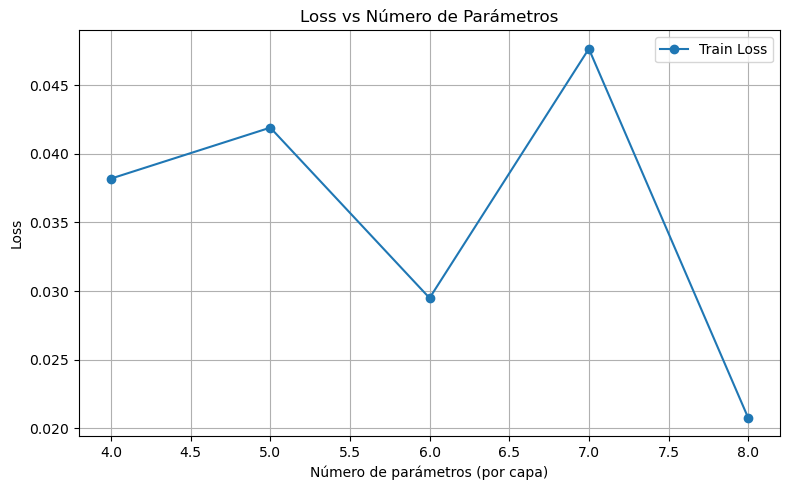

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

NUM_FEATURES = 6

FREEZE = 0
folder = f"/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2/{NUM_FEATURES}features"

param_range = range(4, 9)

num_params_list = []
train_loss_list = []
test_acc_list = []
init_weights   = []

for NUM_PARAMS in param_range:
    path = os.path.join(folder, f"modelo_optimo_NUM_FEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_metrics.csv")
    
    if not os.path.exists(path):
        print(f"⚠️ Archivo no encontrado: {path}")
        continue

    df = pd.read_csv(path)
    
    num_params_list.append(NUM_PARAMS)
    train_loss_list.append(df["Loss"].iloc[0])
    test_acc_list.append(df["TestAcc"].iloc[0])
    init_weights.append(df['InitWeights'].iloc[0])

# === Plot ===
plt.figure(figsize=(8, 5))
plt.plot(np.arange(4,9), train_loss_list, marker='o', label='Train Loss')
plt.xlabel("Número de parámetros (por capa)")
plt.ylabel("Loss")
plt.title("Loss vs Número de Parámetros")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 5 features

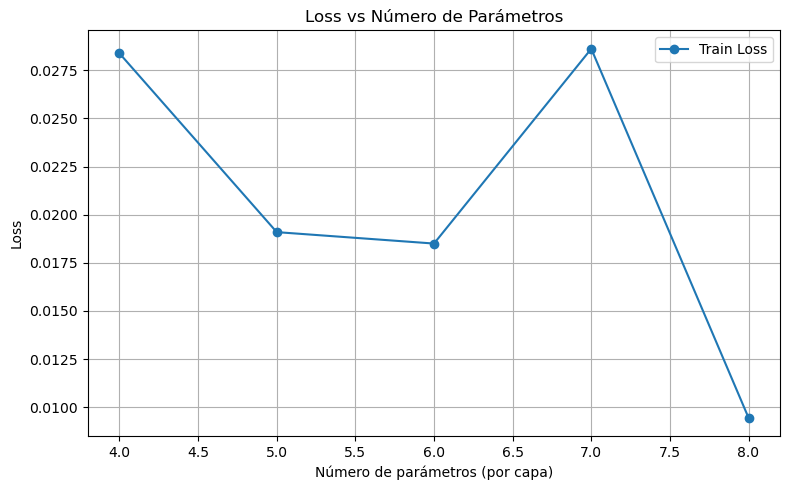

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

NUM_FEATURES = 5

FREEZE = 0
folder = f"/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2/{NUM_FEATURES}features"

param_range = range(4, 9)

num_params_list = []
train_loss_list = []
test_acc_list = []
init_weights   = []

for NUM_PARAMS in param_range:
    path = os.path.join(folder, f"modelo_optimo_NUM_FEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_metrics.csv")
    
    if not os.path.exists(path):
        print(f"⚠️ Archivo no encontrado: {path}")
        continue

    df = pd.read_csv(path)
    
    num_params_list.append(NUM_PARAMS)
    train_loss_list.append(df["Loss"].iloc[0])
    test_acc_list.append(df["TestAcc"].iloc[0])
    init_weights.append(df['InitWeights'].iloc[0])

# === Plot ===
plt.figure(figsize=(8, 5))
plt.plot(np.arange(4,9), train_loss_list, marker='o', label='Train Loss')
plt.xlabel("Número de parámetros (por capa)")
plt.ylabel("Loss")
plt.title("Loss vs Número de Parámetros")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 4 features

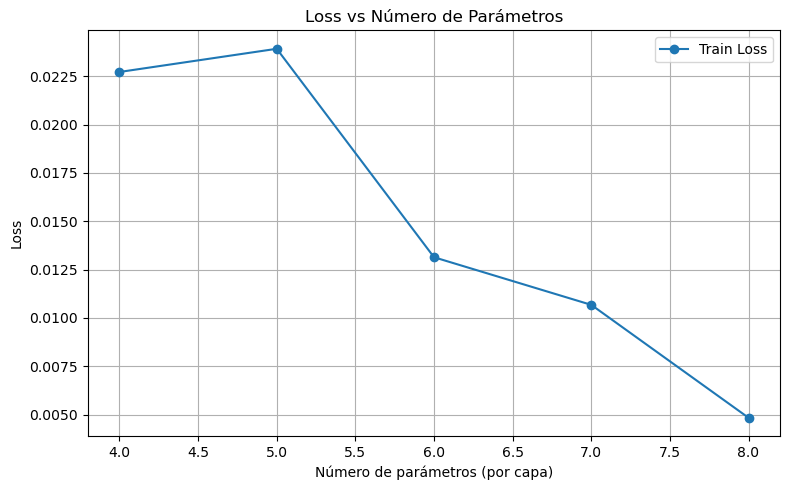

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

NUM_FEATURES = 4

FREEZE = 0
folder = f"/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2/{NUM_FEATURES}features"

param_range = range(4, 9)

num_params_list = []
train_loss_list = []
test_acc_list = []
init_weights   = []

for NUM_PARAMS in param_range:
    path = os.path.join(folder, f"modelo_optimo_NUM_FEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_metrics.csv")
    
    if not os.path.exists(path):
        print(f"⚠️ Archivo no encontrado: {path}")
        continue

    df = pd.read_csv(path)
    
    num_params_list.append(NUM_PARAMS)
    train_loss_list.append(df["Loss"].iloc[0])
    test_acc_list.append(df["TestAcc"].iloc[0])
    init_weights.append(df['InitWeights'].iloc[0])

# === Plot ===
plt.figure(figsize=(8, 5))
plt.plot(np.arange(4,9), train_loss_list, marker='o', label='Train Loss')
plt.xlabel("Número de parámetros (por capa)")
plt.ylabel("Loss")
plt.title("Loss vs Número de Parámetros")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

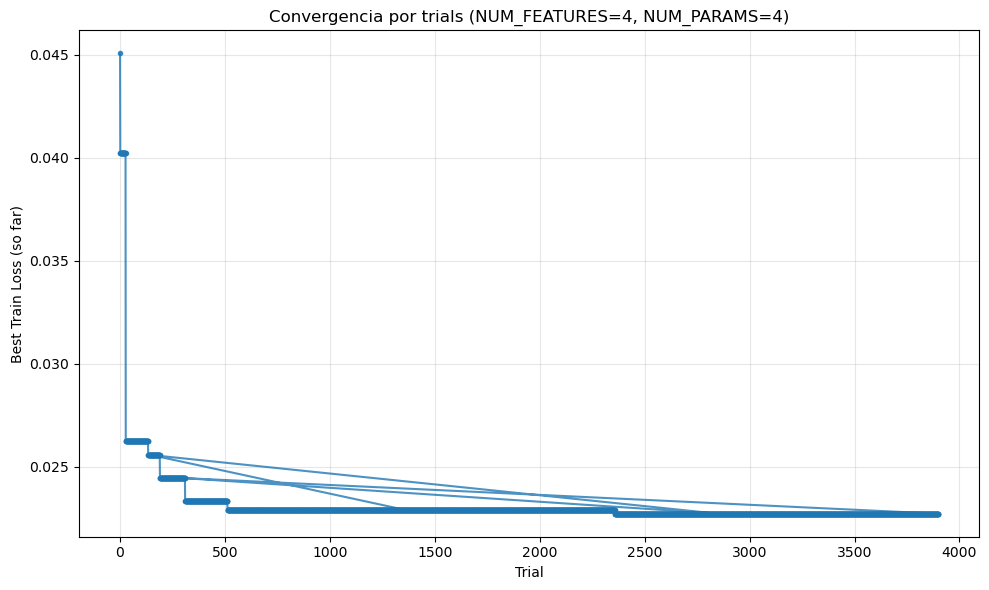

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2"
NUM_FEATURES = 4
NUM_PARAMS   = 4

# buscar todos los chunks guardados
pattern = f"{BASE_SAVE_DIR}/train_progress_NUMFEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_*.csv"
files = sorted(glob.glob(pattern))

# concatenar todo en un solo DataFrame
dfs = [pd.read_csv(f) for f in files]
df_all = pd.concat(dfs, ignore_index=True)

# graficar best loss vs trial
plt.figure(figsize=(10,6))
plt.plot(df_all["Trial"], df_all["BestTrainLoss"], marker='.', alpha=0.8)
plt.xlabel("Trial")
plt.ylabel("Best Train Loss (so far)")
plt.title(f"Convergencia por trials (NUM_FEATURES={NUM_FEATURES}, NUM_PARAMS={NUM_PARAMS})")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [151]:
print(df_all["BestTrainLoss"])

0       0.045059
1       0.040220
2       0.040220
3       0.040220
4       0.040220
          ...   
3895    0.022921
3896    0.022921
3897    0.022921
3898    0.022921
3899    0.022921
Name: BestTrainLoss, Length: 3900, dtype: float64


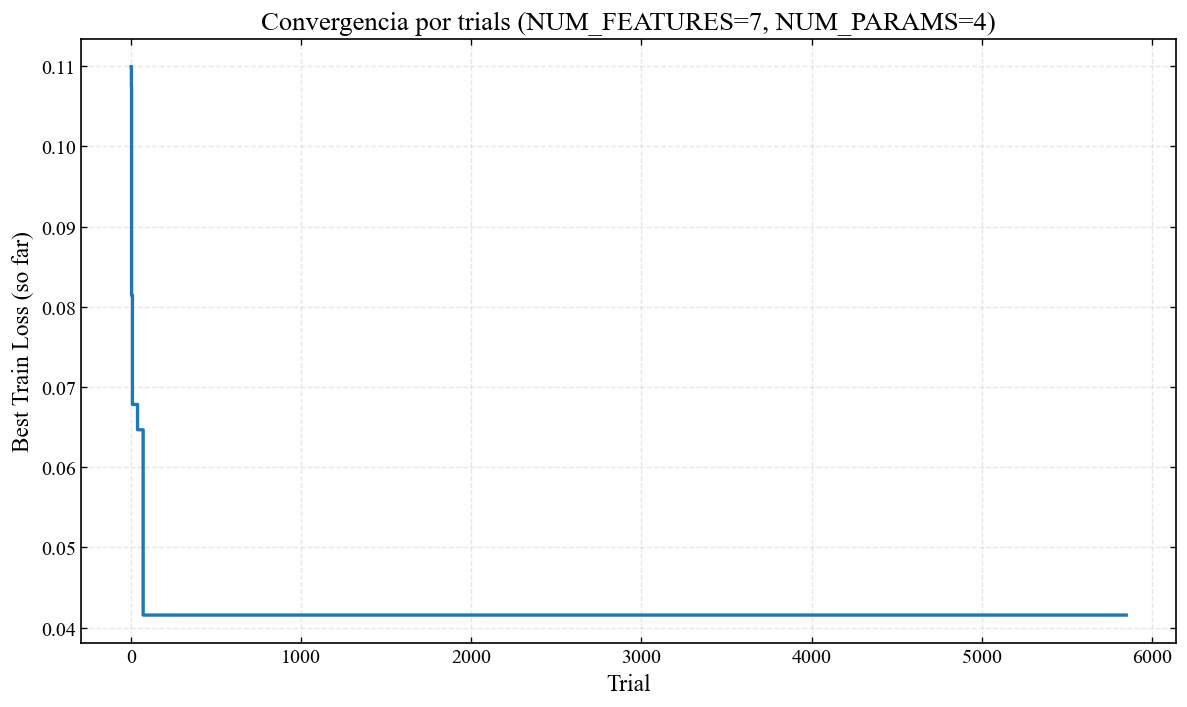

In [6]:
import glob, pandas as pd
import matplotlib.pyplot as plt

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2"
NUM_FEATURES = 7
NUM_PARAMS   = 4

# Cargar y concatenar todos los chunks
files = sorted(glob.glob(f"{BASE_SAVE_DIR}/train_progress_NUMFEATURES_{NUM_FEATURES}_NUM_PARAMS_{NUM_PARAMS}_*.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

# Asegurar orden por Trial y recomputar best-so-far por seguridad
df = df.sort_values("Trial").reset_index(drop=True)
df["BestSoFar"] = df["BestTrainLoss"].cummin()

plt.figure(figsize=(10,6))
plt.plot(df["Trial"], df["BestSoFar"], drawstyle="steps-post", linewidth=2)
plt.xlabel("Trial")
plt.ylabel("Best Train Loss (so far)")
plt.title(f"Convergencia por trials (NUM_FEATURES={NUM_FEATURES}, NUM_PARAMS={NUM_PARAMS})")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 4 parameter (per layer) training with 4000 initial parameters

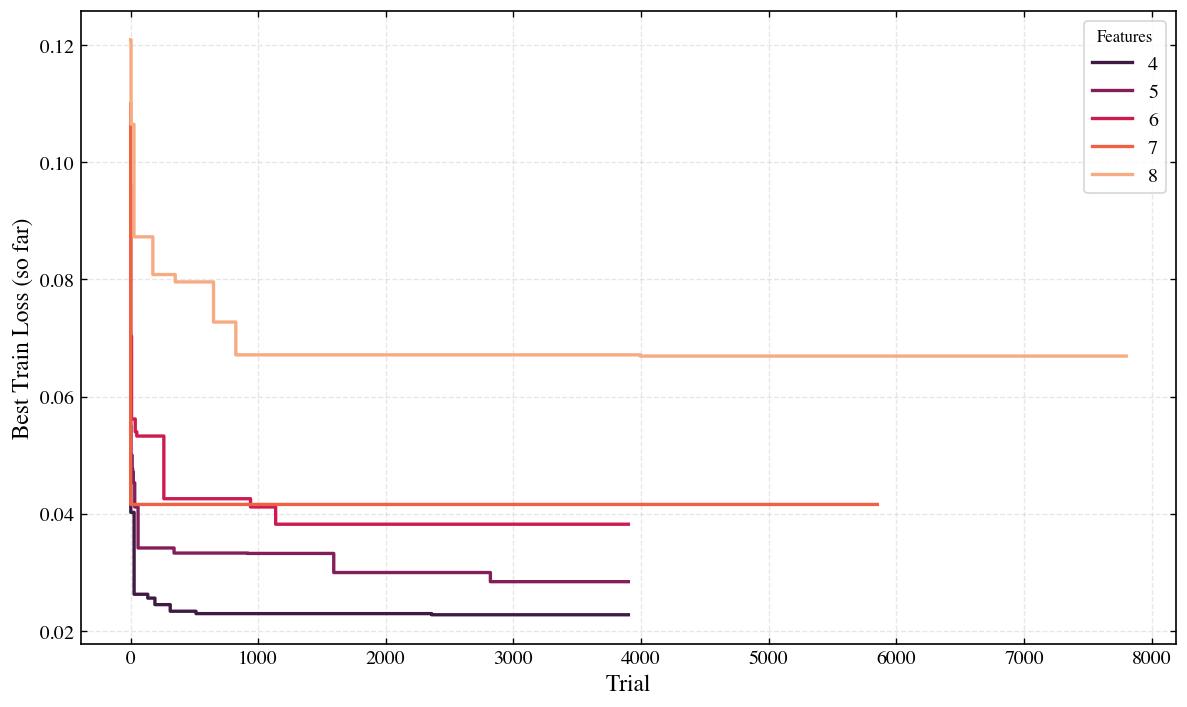

In [2]:
import glob, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BASE_SAVE_DIR = "/Users/ccristiano/Documents/Codigos/QML/MNIST/qutrit/data/TestConvergence_SequentialTraining2"
NUM_PARAMS = 4
features_list = [4, 5, 6, 7, 8]
palette = sns.color_palette("rocket", len(features_list))

plt.figure(figsize=(10,6))

for i, F in enumerate(features_list):
    # upload and concatenate all files (per feature)
    files = sorted(glob.glob(f"{BASE_SAVE_DIR}/train_progress_NUMFEATURES_{F}_NUM_PARAMS_{NUM_PARAMS}_*.csv"))
    if not files:
        print(f"[warn] no encontré archivos para NUM_FEATURES={F}")
        continue
    df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
    # sort by trial and re-compute best-so-far
    df = df.sort_values("Trial").reset_index(drop=True)
    df["BestSoFar"] = df["BestTrainLoss"].cummin()
    # plot
    plt.plot(df["Trial"], df["BestSoFar"], drawstyle="steps-post", linewidth=2, label=f"{F}", color=palette[i])

plt.xlabel("Trial")
plt.ylabel("Best Train Loss (so far)")
plt.legend(title="Features")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Config estilo "paper científico"
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],   # podés poner "Computer Modern" si querés el default de LaTeX
    "axes.labelsize": 14,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.figsize": (6, 4),
    "figure.dpi": 100,
})

# Test rápido
plt.plot([0, 1], [0, 1], label=r"$y = x$")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"Test de \LaTeX{} en Matplotlib")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 600x400 with 1 Axes>

In [2]:
import os, shutil, matplotlib as mpl

# 1) Asegurar PATH para el kernel de Jupyter
texbin = "/Library/TeX/texbin"
if texbin not in os.environ.get("PATH",""):
    os.environ["PATH"] = texbin + ":" + os.environ.get("PATH","")

# 2) Verificar binarios clave
print("latex  ->", shutil.which("latex"))
print("dvipng ->", shutil.which("dvipng"))
print("dvisvgm->", shutil.which("dvisvgm"))
print("gs     ->", shutil.which("gs"))  # ghostscript (opcional)

# 3) Activar LaTeX en Matplotlib (hacer esto ANTES de importar pyplot)
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],  # o "Computer Modern"
})


latex  -> /Library/TeX/texbin/latex
dvipng -> /Library/TeX/texbin/dvipng
dvisvgm-> /Library/TeX/texbin/dvisvgm
gs     -> None


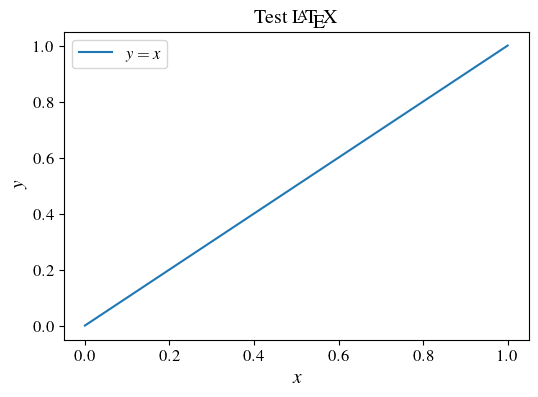

In [3]:
import matplotlib.pyplot as plt

plt.plot([0,1],[0,1], label=r"$y=x$")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"Test \LaTeX{}")
plt.legend()
plt.show()